In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

In [2]:
buffalo_ml_path = "Output/buffalo_ml.csv"
buffalo_ml_data = pd.read_csv(buffalo_ml_path)

In [3]:
buffalo_ml_data 

,Unnamed: 0,Year,Buffalo Load,Buffalo Loss,Buffalo Pct
0,0,14,4093,19,0.464207
1,1,15,5097,11,0.215813
2,2,16,4230,22,0.520095
3,3,17,7214,40,0.554477
4,4,18,7147,32,0.447740
5,5,19,9530,43,0.451207


In [4]:
buffalo_ml_data = buffalo_ml_data[["Year","Buffalo Pct"]] 
buffalo_ml_data = buffalo_ml_data.rename(columns={"Buffalo Pct": "Buffalo_Pct"})
buffalo_ml_data

,Year,Buffalo_Pct
0,14,0.464207
1,15,0.215813
2,16,0.520095
3,17,0.554477
4,18,0.447740
5,19,0.451207


In [5]:
buffalo_ml_data["Buffalo_Pct"]=buffalo_ml_data["Buffalo_Pct"].round(4)
buffalo_ml_data

,Year,Buffalo_Pct
0,14,0.4642
1,15,0.2158
2,16,0.5201
3,17,0.5545
4,18,0.4477
5,19,0.4512


In [6]:
X = buffalo_ml_data.Year.values.reshape(-1, 1)
y = buffalo_ml_data.Buffalo_Pct.values.reshape(-1, 1)

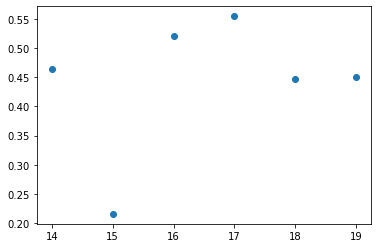

In [12]:
plt.scatter(X, y)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [15]:

model.fit(X, y)
print(model)

LinearRegression()


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[0.01900286]]
y-axis intercept:  [0.12870286]


In [17]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0.4642]
Predicted output: [0.39474286]
Prediction Error: [-0.06945714]


In [42]:

data = {"Predicted": predictions, 
        "Actual": y,
        "Error": (predictions-y)
        }


df = pd.DataFrame (data, columns = ["Predicted","Actual","Error"])
df

ValueError: If using all scalar values, you must pass an index

We can calculate the output response for the minimum and maximum input values. Note: This is useful later when we want to plot the fit line.

In [11]:
x_min = X.min()
x_max = X.max()

In [12]:
y_min_actual = y.min()
y_max_actual = y.max()

In [13]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.215813223
Calculated Min Value: 276.056564417
Actual Max Value: 0.554477405
Calculated Max Value: 338.25668561699996


We can also use the predict function to calculate predicted values

In [14]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

We can show the model fit by plotting the predicted values against the original data

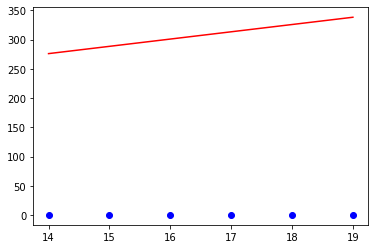

In [15]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

## Your Turn!